#                                                INT 353 CA2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('smoke_detection_iot.csv')
data

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [3]:
data.head(10)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.00,0.0,0.000,0.00,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.00,0.0,0.000,0.00,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.00,0.0,0.000,0.00,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.00,0.0,0.000,0.00,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.00,0.0,0.000,0.00,4,0
5,5,1654733336,20.073,54.12,0,400,12419,18998,939.725,0.0,0.00,0.0,0.000,0.00,5,0
6,6,1654733337,20.088,53.61,0,400,12432,19058,939.738,0.0,0.00,0.0,0.000,0.00,6,0
7,7,1654733338,20.103,53.20,0,400,12439,19114,939.758,0.0,0.00,0.0,0.000,0.00,7,0
8,8,1654733339,20.117,52.81,0,400,12448,19155,939.758,0.0,0.00,0.0,0.000,0.00,8,0
9,9,1654733340,20.132,52.46,0,400,12453,19195,939.756,0.9,3.78,0.0,4.369,2.78,9,0


In [4]:
data.tail(10)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62620,62620,1655130042,17.377,15.75,621,400,13725,20570,936.656,0.59,0.61,4.06,0.634,0.014,5734,0
62621,62621,1655130043,17.588,15.73,635,400,13718,20569,936.668,0.64,0.67,4.42,0.690,0.016,5735,0
62622,62622,1655130044,17.800,15.79,637,400,13715,20550,936.675,0.66,0.68,4.54,0.707,0.016,5736,0
62623,62623,1655130045,18.012,15.78,650,400,13703,20546,936.673,0.66,0.69,4.57,0.713,0.016,5737,0
62624,62624,1655130046,18.225,15.81,630,400,13719,20564,936.659,0.66,0.68,4.52,0.705,0.016,5738,0
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [43]:
data.isnull()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62626,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62627,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62628,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [7]:
data.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [44]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
62625    False
62626    False
62627    False
62628    False
62629    False
Length: 62630, dtype: bool

# Univariate Analysis

Minimum SP: 10668
Maximum SP: 13803


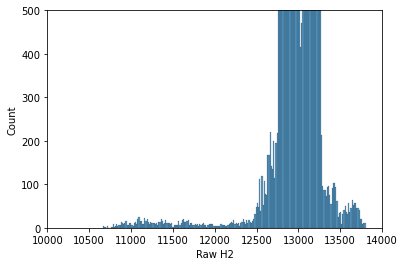

In [8]:
# HISTOGRAM - sns.histplot()
fig, ax = plt.subplots()
sns.histplot(x='Raw H2', data=data)
print("Minimum SP:",data['Raw H2'].min())
print("Maximum SP:",data['Raw H2'].max())
ax.set_xlim(10000, 14000)
ax.set_ylim(0, 500)

plt.show()

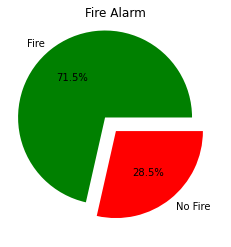

In [9]:
# pie plot
plt.pie(data['Fire Alarm'].value_counts(),[0.2,0],labels=['Fire','No Fire'],autopct='%1.1f%%',colors=['green','red'])
plt.title('Fire Alarm')
plt.show()

<AxesSubplot:xlabel='Raw Ethanol', ylabel='Density'>

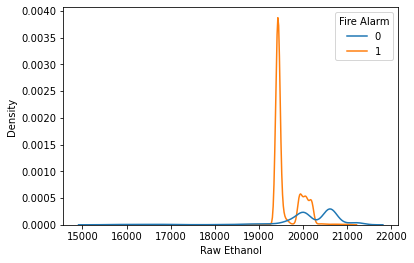

In [10]:
# KDE PLOT - Kernal Density Plot - sns.kdeplot()
sns.kdeplot(x='Raw Ethanol', data=data, hue='Fire Alarm')

ValueError: num must be 1 <= num <= 9, not 10

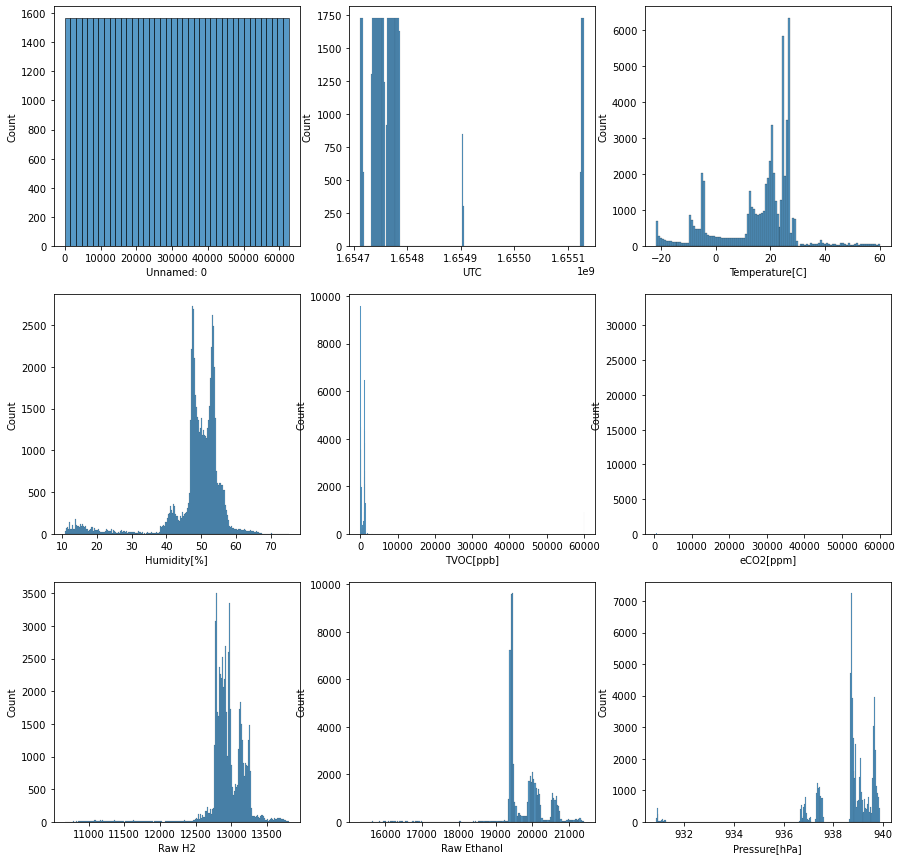

In [11]:
cols = 3
rows = 3
num_cols = data.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
#for i in num_cols:    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = data[col], ax = ax)
    
fig.tight_layout()  
plt.show()

<AxesSubplot:xlabel='Humidity[%]', ylabel='Count'>

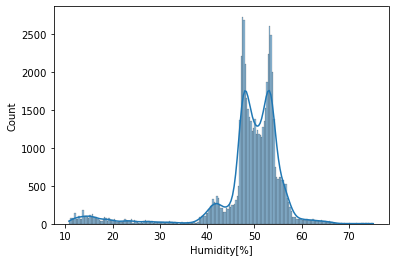

In [12]:
# with histogram - sns.histplot(kde=TRUE)
sns.histplot(x='Humidity[%]', data=data, kde=True)

<AxesSubplot:xlabel='TVOC[ppb]'>

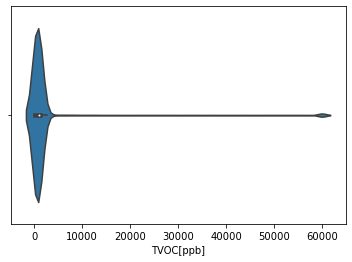

In [13]:
# VIOLINE PLOT - box and kernel
sns.violinplot(x=data["TVOC[ppb]"])

<AxesSubplot:xlabel='Temperature[C]'>

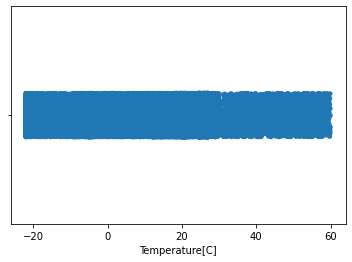

In [14]:
# STRIP PLOT
sns.stripplot(x=data["Temperature[C]"])

# Bivariate Analysis

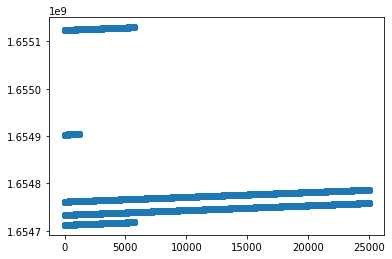

In [31]:
# NUMERICAL - NUMERICAL ASSOCIATIONS
plt.scatter(data.CNT,data.UTC)
plt.show()

<AxesSubplot:>

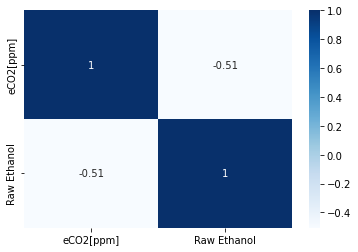

In [16]:
# Correlation Matrix
sns.heatmap(data[["eCO2[ppm]","Raw Ethanol"]].corr(), annot=True, cmap="Blues")

<AxesSubplot:xlabel='TVOC[ppb]', ylabel='Pressure[hPa]'>

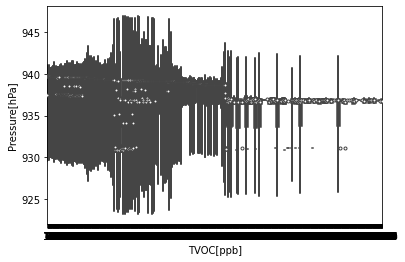

In [17]:
# Violin Plot
sns.violinplot(x=data["TVOC[ppb]"], y=data["Pressure[hPa]"])

<AxesSubplot:ylabel='Pressure[hPa]'>

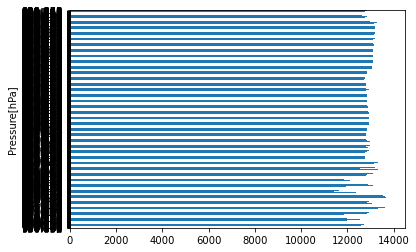

In [18]:
# Bar Graph
data.groupby("Pressure[hPa]")["Raw H2"].mean().plot.barh()

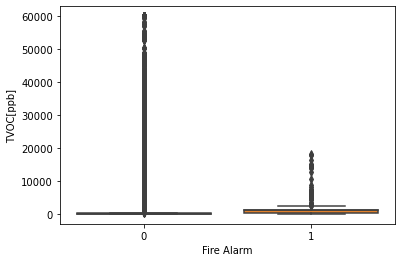

In [19]:
# CATEGORICAL - NUMERICAL ASSOCIATIONS
# Box Plot
sns.boxplot(data=data, x="Fire Alarm", y="TVOC[ppb]")
plt.show()

In [32]:
# Count Plot
sns.countplot(data = data, x = 'UTC', hue = 'CNT')

KeyboardInterrupt: 

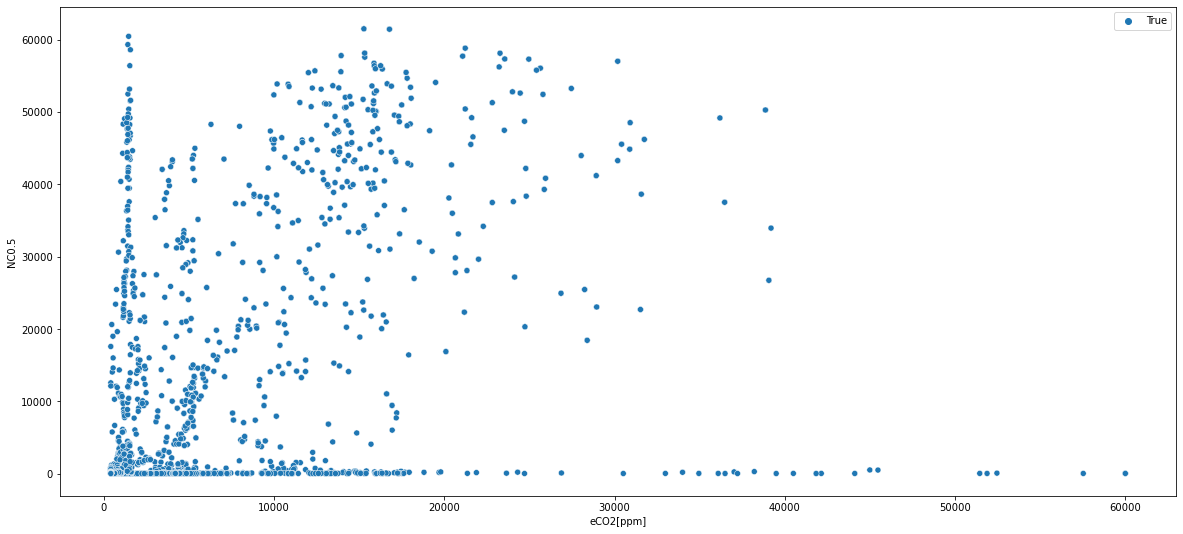

In [21]:
plt.figure(1 , figsize = (20 , 9))

sns.scatterplot(x = 'eCO2[ppm]' , y  = 'NC0.5' , hue = True , data = data)
plt.show()

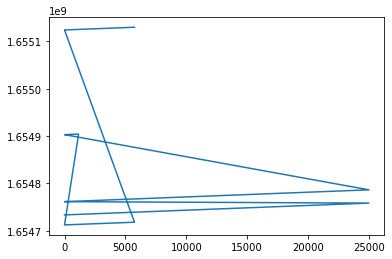

In [29]:
# Line Plot
x = data.CNT
y = data.UTC
plt.plot(x, y)
plt.show()

# Statistical data analysis of numerical values

In [39]:
data["Temperature[C]"].mean()

15.970423582947387

In [40]:
data["Temperature[C]"].median()

20.13

In [41]:
data["Temperature[C]"].mode()

0    24.48
dtype: float64

In [42]:
data["Temperature[C]"].std()

14.359576152610954

# Multivariate Analysis

In [ ]:
#scatter plot
fig = px.scatter(data, x="tax",y='mpg', color="Make",
                 size='mileage', hover_name="model",trendline="ols",
                 template="plotly_dark",marginal_x="box",marginal_y="box")
fig.show()